# Text Recognition and Dataset from floorplan

In [1]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import re
from PIL import Image
from numpy import random
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/tesseract-OCR/tesseract.exe'

## Main functions

This function will extract the data

In [2]:
def extract_values(image):
    draft = pytesseract.image_to_string(image)
    draft = draft.splitlines()
    
    draft = [x.lower() for x in draft]
    return draft 

This function will clean the data extracted by deleting the blanks

In [3]:
def clean_values(X):
    X = [s.replace(' ', '') for s in X]
    clean = []
    for string in X:
        if (string != ""):
            clean.append(string)
        
    return clean

Cleaning the exceptions from the array by hand

In [4]:
def deep_c():
    
    deep = (clean_values(extract_values(image)))
    bad_chrs = [] 
    junk = [] 
    
    
    n = int(input("Enter number of junk lines to remove : "))
    
    for i in range(0, n): 
        tg = (input('JUNK ')) 
        junk.append(tg)
        
    for i in junk :
        deep.remove(i)
        
    x = int(input("Enter number of bad characters to replace : "))
    z= input('by which value you want to replace bad characters ?')
    
    for i in range(0, x): 
        tgg = input('BAD ') 
        bad_chrs.append(tgg) 
        
    for i in bad_chrs:
        deep = [deep.replace(i,z) for deep in deep]
        
    p = int(input('How many lines are missing ? ')) 
    for i in range (0,p):
        pi = str(input('ADD MISSING '))
        deep.append(pi)
        
    return(deep)

This function will go over the extracted data and recognize the rooms and assign them their values
and finnaly create the new row of the dataset

In [5]:

def row(final):
    piece = ['kitchen/diner',
             'kitchen.diner',
             'sittingroom',
             'masterbedroom',
             'bedroom3',
             'bedroom2',
             'bedroom',
             'livingroom',
             'bath',
             'kitchen',
             'totalarea',
            'balcony',
            'kitchen&diningarea',
            'entryhall',
            'livingarea',
            'bathroom',
            'master bedroom',
            'familyroom',
            'guestroom',
            'diningroom',
            'greatroom',
            'bedroom#2']

    rooms = []
    dim = []
    x = -1

    for i in final:
        if (i in piece):
            rooms.append(i)
            x = x + 2
            dim.append(final[x])

    bathroom_set = ['bathroom','bath','closet','toilet','wc','w.c','entryhall']
    kitchen_set = ['kitchen','kitchen','kitchen.diner','kitchen.diner','kitchen&diningarea']
    living_set = ['livingroom','livingarea','living_room','familyroom','diningroom','greatroom']
    bedroom1_set = ['bedroom','bedroom1','masterbedroom']
    bedroom2_set = ['bedroom2','bedroom 2','guestroom']
    bedroom3_set = ['bedroom3','bedroom 3']
    total_area_set = ['totalarea','total area']


    bathroom = 0
    kitchen = 0
    living_room = 0
    bedroom1 = 0
    bedroom2 = 0
    bedroom3 = 0
    total_area = float("NaN")

    price = float("NaN")
    location = float("NaN")


    for i in range(len(rooms)):


        bat = rooms[i] not in bathroom_set
        kit = rooms[i] not in kitchen_set
        liv = rooms[i] not in living_set
        bed1 = rooms[i] not in bedroom1_set
        bed2 = rooms[i] not in bedroom2_set
        bed3 = rooms[i] not in bedroom3_set
        tot1 = rooms[i] not in total_area_set

        if (bat == False):
            bathroom = dim[i]

        if (kit == False):
            kitchen = dim[i]

        if (liv == False):
            living_room = dim[i]

        if (bed1 == False):
            bedroom1 = dim[i]

        if (bed2 == False):
            bedroom2 = dim[i]

        if (bed3 == False):
            bedroom3 = dim[i]

        if (tot1 == False):
            total_area = dim[i]
            
    

    new_row = {'total_area': total_area, 'bathroom': bathroom, 'kitchen': kitchen, 'living_room': living_room,
               'bedroom1': bedroom1,'bedroom2': bedroom2,'bedroom3': bedroom3, 'price': price ,'location': location}

    return new_row

---

## Apply to the final dataset

This function will compute the values which are extracted as 'yyy x yyy'

In [6]:
#To compute values read as '43,4x12,3'

def cleaner(column,data):
    temp = []
    z = -1
    new = []
    for i in data[column]:
        temp.append(i)
        z += 1
        mot = temp[z]

        if (type(mot) == str):
            renamer = re.sub("[^0-9.]", ' * ', mot)
            splitter = [int(s) for s in renamer.split() if s.isdigit()]
            if (len(splitter)== 2):
                finish = splitter[0] * splitter[1]
                new.append(finish)
            else:
                new.append(i)

        else:
            new.append(i)

    data[column] = new

    return data 

In [7]:
def computer(data):
    for i in data:
        calcul = cleaner(i,data)

    data = calcul
    return data

---

## Load image to recognize and dataset

In [29]:
image = Image.open('legit/floorplan47.png')
data = pd.read_csv('data.csv')
#image = image.resize((image.size[0] * 5, image.size[1] * 5))

**display the image to recognize**

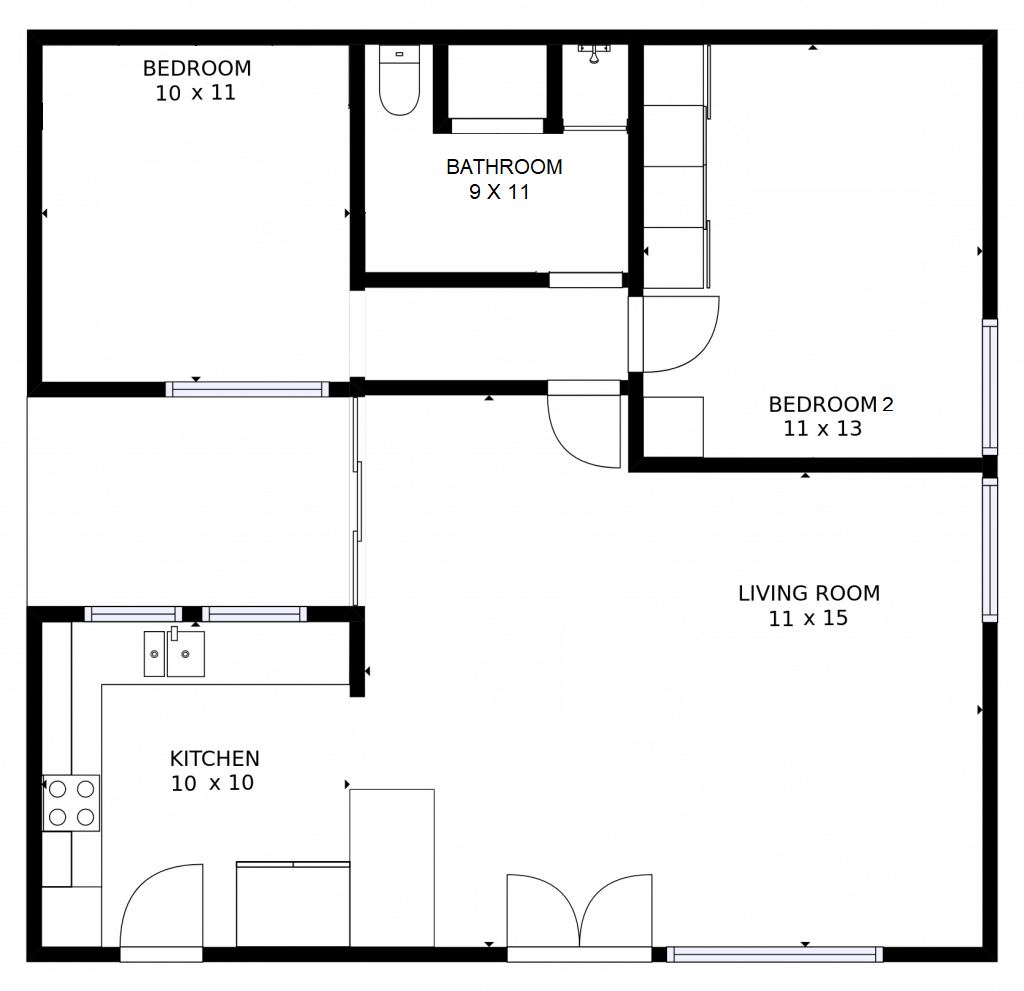

In [9]:
image

# Extract 

In [12]:
clean_values(extract_values(image))

['bedroom',
 '10x11',
 'kitchen',
 '10x10',
 'bathroom',
 '9x11',
 'bedroom2',
 '11x13',
 'livingroom',
 '11x15']

**Clean the extracted data**

In [13]:
new_row = row(deep_c())

Enter number of junk lines to remove : 0
Enter number of bad characters to replace : 0
by which value you want to replace bad characters ?
How many lines are missing ? 0


Add the data to the dataset

In [14]:
new_row

{'total_area': nan,
 'bathroom': '9x11',
 'kitchen': '10x10',
 'living_room': '11x15',
 'bedroom1': '10x11',
 'bedroom2': '11x13',
 'bedroom3': 0,
 'price': nan,
 'location': nan}

In [50]:
data = data.append(new_row, ignore_index=True)

Computing values that are not already computed

In [20]:
data = computer(data)

---

# Final dataset

In [30]:
data

,total_area,bathroom,kitchen,living_room,bedroom1,bedroom2,bedroom3,price,location
0,573,40,195,143,195,0,0,230319.0,75004
1,1150,112,345,472,221,0,0,579213.0,75001
2,524,60,132,166,166,0,0,204766.0,75001
3,925,126,90,441,268,0,0,424423.0,75004
4,801,67,173,425,136,0,0,490338.0,75020
...,...,...,...,...,...,...,...,...,...
995,715,40,266,255,154,0,0,330535.0,75014
996,327,31,45,123,52,76,0,137672.0,75008
997,617,99,100,165,110,143,0,373111.0,75016
998,197,43,0,0,154,0,0,127488.0,75016


**Import dataset to csv**

In [74]:
data.to_csv('data.csv',index = False)